In [1]:
# %matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [2]:
# 讀取資料
import pandas as pd
df = pd.read_csv('./data.csv')
df

,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1
5,0.44,1
6,0.32,0
7,0.80,1
8,0.22,1
9,0.08,0


## Plot 
1. 計算第二欄的真(1)與假(0)的個數，假設分別為P及N，Y軸切成P格，X軸切成N格，如下圖。
2. 以第一欄降冪排序，從大排到小。
3. 依序掃描第二欄，若是1，就往『上』畫一格，反之，若是0，就往『右』畫一格，直到最後一列，如下圖。

In [3]:
(df['actual'] == 1), type(df['actual'] == 1)

(0     False
 1     False
 2      True
 3      True
 4      True
 5      True
 6     False
 7      True
 8      True
 9     False
 10     True
 11    False
 12     True
 13    False
 14    False
 15     True
 16     True
 17     True
 Name: actual, dtype: bool,
 pandas.core.series.Series)

In [4]:
df[df['actual'] == 1], type(df[df['actual'] == 1]), df[df['actual'] == 1].shape

(    predict  actual
 2      0.72       1
 3      0.10       1
 4      0.99       1
 5      0.44       1
 7      0.80       1
 8      0.22       1
 10     0.56       1
 12     0.42       1
 15     0.65       1
 16     0.71       1
 17     0.82       1,
 pandas.core.frame.DataFrame,
 (11, 2))

In [5]:
# 計算第二欄的真(1)與假(0)的個數，假設分別為P及N
P = df[df['actual'] == 1].shape[0]
N = df[df['actual'] == 0].shape[0]
print(P, N)
y_unit = 1 / P
X_unit = 1 / N

11 7


In [6]:
# 以第一欄降冪排序，從大排到小。
df.sort_values?
df2 = df.sort_values(by='predict', ascending=False)
df2

,predict,actual
4,0.99,1
17,0.82,1
7,0.80,1
13,0.73,0
2,0.72,1
16,0.71,1
15,0.65,1
10,0.56,1
11,0.48,0
5,0.44,1


In [7]:
df2.itertuples?
for row in df2.itertuples(): # Iterate over DataFrame rows as namedtuples.
    print(type(row))
    print(row)
    print(row[0], row[1], row[2])

<class 'pandas.core.frame.Pandas'>
Pandas(Index=4, predict=0.99, actual=1)
4 0.99 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=17, predict=0.82, actual=1)
17 0.82 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=7, predict=0.8, actual=1)
7 0.8 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=13, predict=0.73, actual=0)
13 0.73 0
<class 'pandas.core.frame.Pandas'>
Pandas(Index=2, predict=0.72, actual=1)
2 0.72 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=16, predict=0.71, actual=1)
16 0.71 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=15, predict=0.65, actual=1)
15 0.65 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=10, predict=0.56, actual=1)
10 0.56 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=11, predict=0.48, actual=0)
11 0.48 0
<class 'pandas.core.frame.Pandas'>
Pandas(Index=5, predict=0.44, actual=1)
5 0.44 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=12, predict=0.42, actual=1)
12 0.42 1
<class 'pandas.core.frame.Pandas'>
Pandas(Index=1, predict=0.35,

In [8]:
for row in df2.itertuples(name = None): # Iterate over DataFrame rows as namedtuples.
    print(type(row))
    print(row)
    print(row[0], row[1], row[2])

<class 'tuple'>
(4, 0.99, 1)
4 0.99 1
<class 'tuple'>
(17, 0.82, 1)
17 0.82 1
<class 'tuple'>
(7, 0.8, 1)
7 0.8 1
<class 'tuple'>
(13, 0.73, 0)
13 0.73 0
<class 'tuple'>
(2, 0.72, 1)
2 0.72 1
<class 'tuple'>
(16, 0.71, 1)
16 0.71 1
<class 'tuple'>
(15, 0.65, 1)
15 0.65 1
<class 'tuple'>
(10, 0.56, 1)
10 0.56 1
<class 'tuple'>
(11, 0.48, 0)
11 0.48 0
<class 'tuple'>
(5, 0.44, 1)
5 0.44 1
<class 'tuple'>
(12, 0.42, 1)
12 0.42 1
<class 'tuple'>
(1, 0.35, 0)
1 0.35 0
<class 'tuple'>
(6, 0.32, 0)
6 0.32 0
<class 'tuple'>
(8, 0.22, 1)
8 0.22 1
<class 'tuple'>
(0, 0.11, 0)
0 0.11 0
<class 'tuple'>
(3, 0.1, 1)
3 0.1 1
<class 'tuple'>
(9, 0.08, 0)
9 0.08 0
<class 'tuple'>
(14, 0.03, 0)
14 0.03 0


In [9]:
# 依序掃描第二欄，計算每一座標點
# 若是1，Y加一單位，反之，若是0，X加一單位
X = []
y = []
current_X = 0
current_y = 0
for row in df2.itertuples(): # Iterate over DataFrame rows as namedtuples.
    # row[0] is index
    #print(row[2])
    if row[2] == 1:
        current_y += y_unit
    else:
        current_X += X_unit
    X.append(current_X)
    y.append(current_y)

X = np.array(X)        
y = np.array(y)    
print(X, type(X))
print(y, type(y))

[0.         0.         0.         0.14285714 0.14285714 0.14285714
 0.14285714 0.14285714 0.28571429 0.28571429 0.28571429 0.42857143
 0.57142857 0.57142857 0.71428571 0.71428571 0.85714286 1.        ] <class 'numpy.ndarray'>
[0.09090909 0.18181818 0.27272727 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.63636364 0.72727273 0.81818182 0.81818182
 0.81818182 0.90909091 0.90909091 1.         1.         1.        ] <class 'numpy.ndarray'>


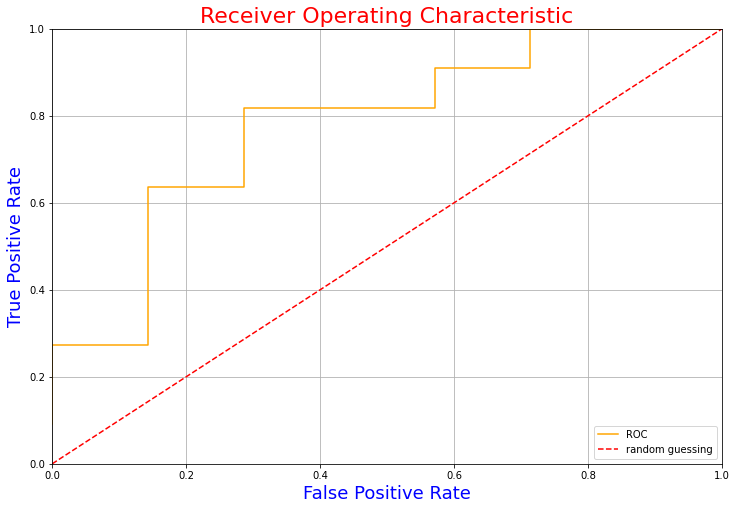

In [20]:
# 繪圖
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic', color = 'r', fontsize = 22)
plt.plot(X, y, color = 'orange', label = 'ROC')
plt.plot([0, 1], [0, 1], 'r--', label = 'random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', color = 'b', fontsize = 18)
plt.xlabel('False Positive Rate', color = 'b', fontsize = 18)
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

## Scikit-Learn 

In [11]:
roc_curve?
# Compute Receiver operating characteristic (ROC)
# Note: this implementation is restricted to the binary classification task.

In [12]:
roc_auc_score?
# Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [13]:
# 在各種『決策門檻』（decision threshold）下，計算 『真陽率』（True Positive Rate；TPR）與『假陽率』（False Positive Rate；FPR）
fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(fpr) # Increasing false positive rates such that element i is the false 
           # positive rate of predictions with score >= thresholds[i].
print('----------')
print(tpr) # Increasing true positive rates such that element i is the true
           # positive rate of predictions with score >= thresholds[i].
print('----------')
print(threshold) # Decreasing thresholds on the decision function used to compute
                 # fpr and tpr. `thresholds[0]` represents no instances being predicted
                 # and is arbitrarily set to `max(y_score) + 1`.
print('----------')
AUC = roc_auc_score(df['actual'], df['predict'])
print(f'AUC = {AUC:0.2f}')

[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ]
----------
[0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ]
----------
[1.99 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]
----------
AUC = 0.78


In [14]:
auc? # Compute Area Under the Curve (AUC) using the trapezoidal rule

SyntaxError: invalid syntax (<ipython-input-14-32763fa52e27>, line 1)

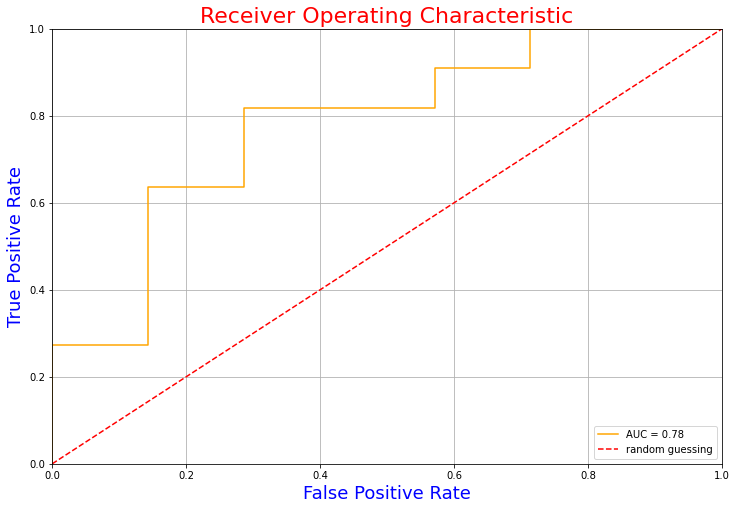

In [19]:
auc1 = auc(fpr, tpr)
# Plot the result
plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic', color = 'r', fontsize = 22)
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.plot([0, 1], [0, 1], 'r--', label = 'random guessing')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate', color = 'b', fontsize = 18)
plt.xlabel('False Positive Rate', color = 'b', fontsize = 18)
plt.legend(loc = 'lower right')
plt.grid()
plt.show()